<a href="https://colab.research.google.com/github/TristanConant/heartdisease/blob/part2/project_2_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [373]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [374]:
file_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQaUVrlyhW3Mv2rayuu6rq4MnZTzIGkyUh0m3RKwAAFGtoa_AUljnZ30K_Urnjmebhtnmw1Q04O0l1j/pub?output=csv'
df = pd.read_csv(file_url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Age: age of the patient [years]<br>
Sex: sex of the patient [M: Male, F: Female]<br>
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br>
RestingBP: resting blood pressure [mm Hg]<br>
Cholesterol: serum cholesterol [mm/dl]<br>
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]<br>
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]<br>
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]<br>
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]<br>
Oldpeak: oldpeak = ST [Numeric value measured in depression]<br>
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]<br>
HeartDisease: output class [1: heart disease, 0: Normal]

In [375]:
# Checking for missing values
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [376]:
df.duplicated().sum()

0

In [377]:
# Looking for incosistencies within the data
for col in df.select_dtypes(include='object').columns:
  display(df[col].value_counts())
  print('\n')

M    725
F    193
Name: Sex, dtype: int64

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

N    547
Y    371
Name: ExerciseAngina, dtype: int64

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [378]:
# Label encode object columns
label_encoder = LabelEncoder()
df_corr = df.copy()
df_corr[['ChestPainType', 'RestingECG', 'ST_Slope', 'ExerciseAngina', 'Sex']] = df_corr[['ChestPainType', 'RestingECG', 'ST_Slope', 'ExerciseAngina', 'Sex']].apply(label_encoder.fit_transform)
df_corr

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


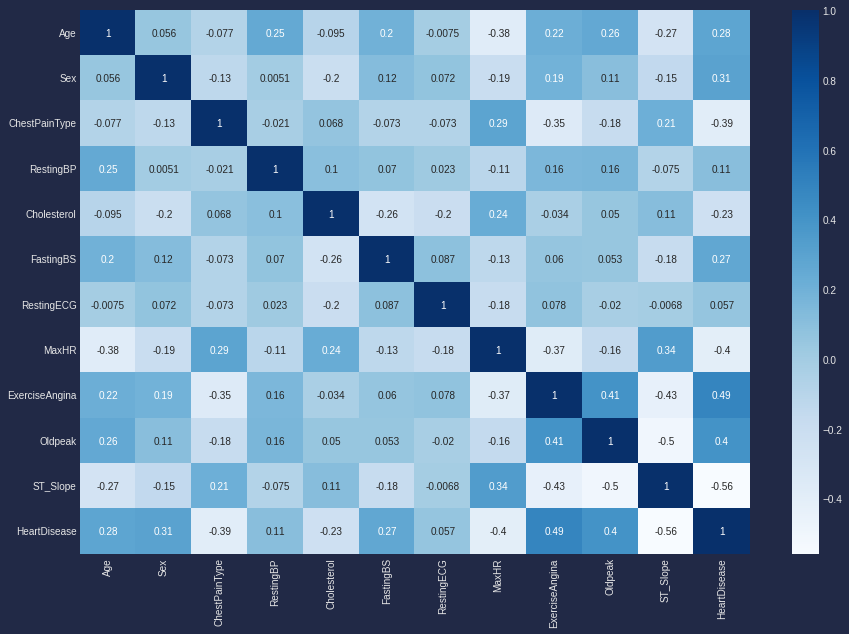

In [379]:
corr = df_corr.corr()
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, annot=True, ax=ax, cmap='Blues');

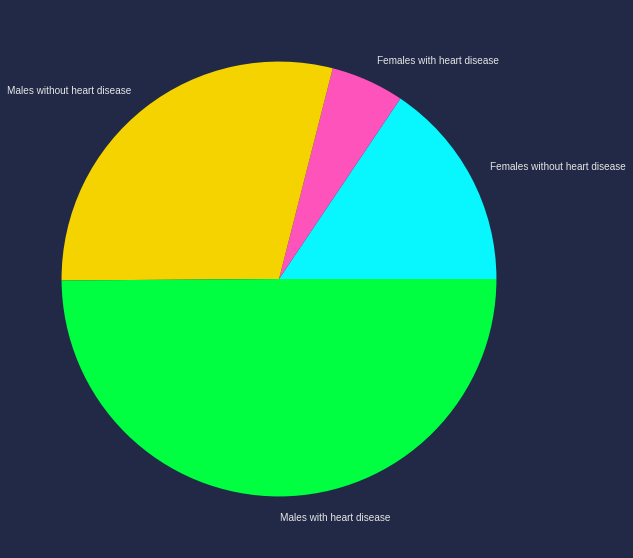

In [380]:
sex = df.groupby(['Sex', 'HeartDisease']).count()
plt.pie(sex['Age'], labels=['Females without heart disease', 'Females with heart disease', 'Males without heart disease', 'Males with heart disease'])
plt.show()

Despite the sample data being skewed with more data from male patients the percentage of total women with heart disease is far lower than males.


In [390]:
HeartDisease_norm = df[df['HeartDisease'] == 0]
HeartDisease_hd = df[df['HeartDisease'] == 1]
chestpain_norm_df = HeartDisease_norm.groupby(['ChestPainType']).mean()
chestpain_hd_df = HeartDisease_hd.groupby(['ChestPainType']).mean()
chestpain_hd_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
ChestPainType,,,,,,,
ASY,55.660714,134.091837,175.974490,0.339286,125.806122,1.331888,1.0
ATA,55.958333,139.666667,233.291667,0.291667,137.500000,0.970833,1.0
NAP,57.430556,132.958333,153.652778,0.305556,129.763889,1.109722,1.0
TA,55.000000,133.850000,186.700000,0.400000,144.500000,1.100000,1.0


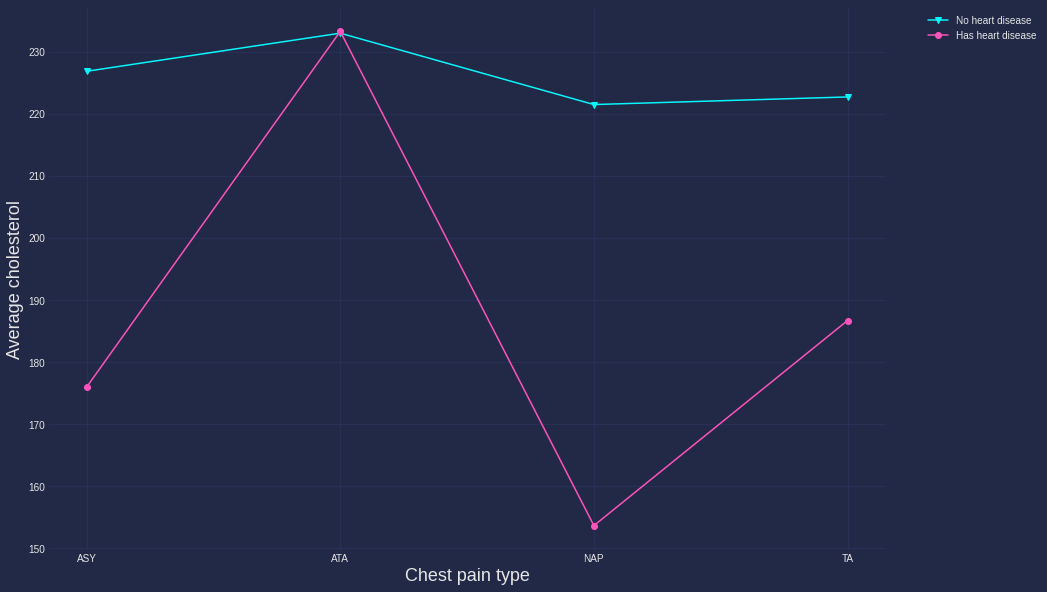

In [391]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(chestpain_norm_df['Cholesterol'], marker='v', label='No heart disease')
plt.plot(chestpain_hd_df['Cholesterol'], marker='o', label='Has heart disease')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel('Chest pain type', fontsize=18)
# plt.xticks(['TA', 'ATA', 'NAP', 'ASY'])
plt.ylabel('Average cholesterol', fontsize=18)
plt.show()

On average patients with heart disease have much higher cholesterol no matter the type of chest pains they're having. However even those without a heart disease but are experiencing atypical angina chest pains also have much higher cholesterol on average.

The key take away is from the two exporatory visualizations is that males with high cholesterol are the most likely to have a heart disease.